In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/GTOMSA/MGMT6203/Twitter_Project/Filteted_Cleaned_Tweets.csv')

# Group the data by 'airline' and 'airline_sentiment' columns and count the occurrences
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')

# Pivot the data to have 'airline_sentiment' as columns
sentiment_counts_pivot = sentiment_counts.pivot(index='airline', columns='airline_sentiment', values='count').fillna(0)

# Display the result
print(sentiment_counts_pivot)
sentiment_counts_pivot.to_csv('/content/drive/MyDrive/GTOMSA/MGMT6203/Twitter_Project/sentiment_counts.csv')


airline_sentiment  negative  neutral  positive
airline                                       
American               1635      235       221
Delta                   688      374       338
Southwest               909      337       387
US Airways             1901      190       167
United                 2120      320       298
Virgin America          129       92       104


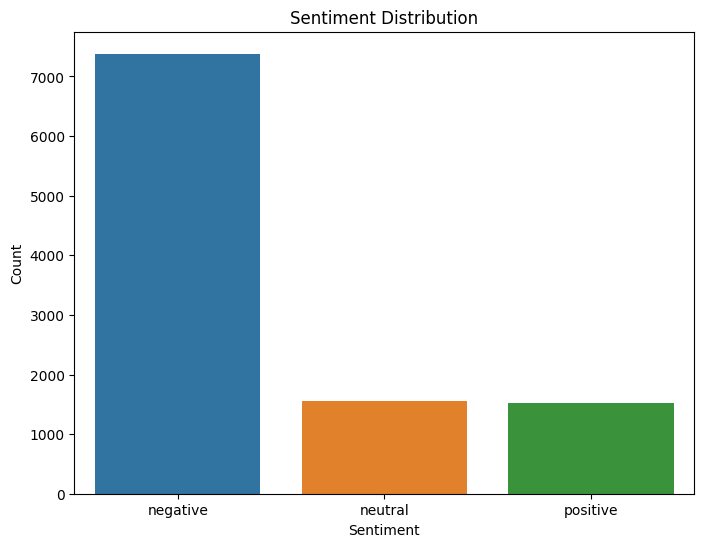

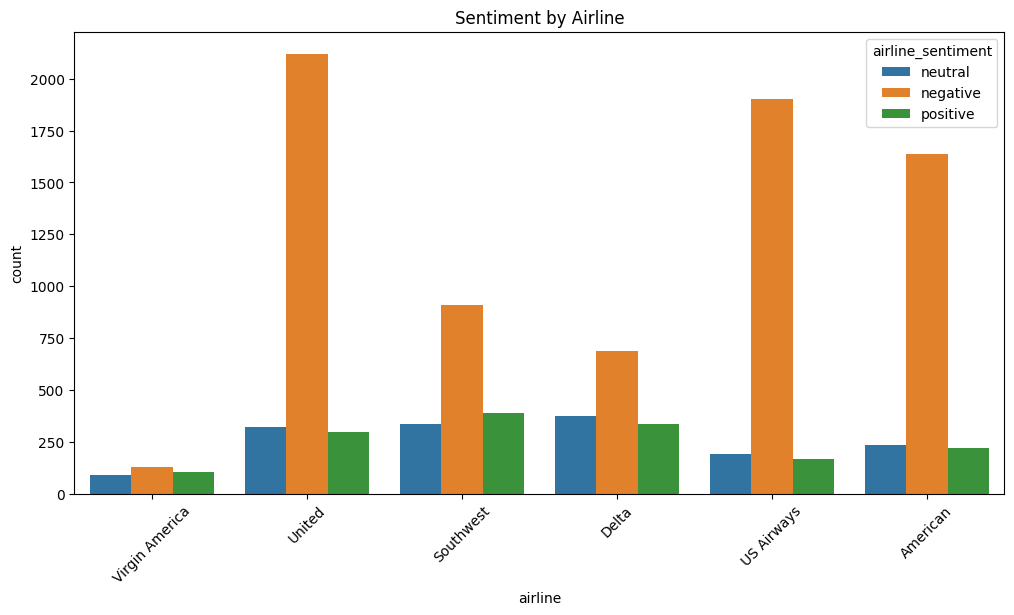

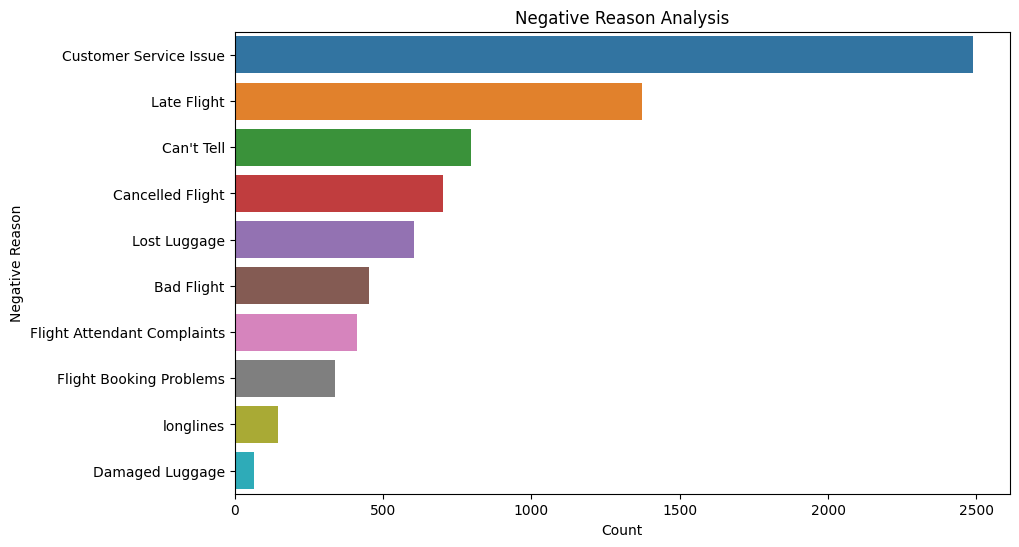

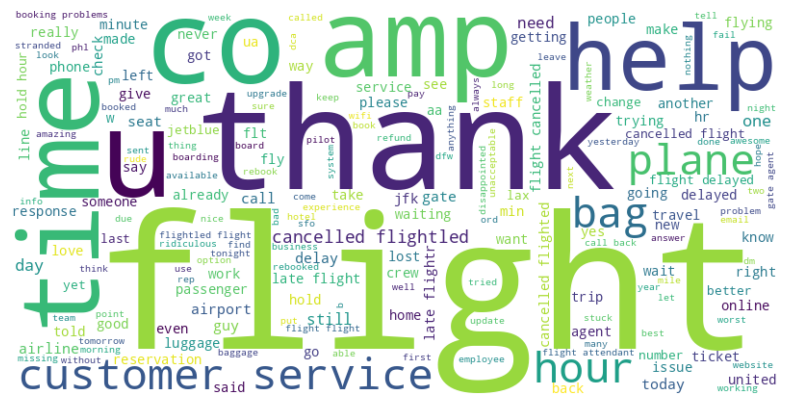

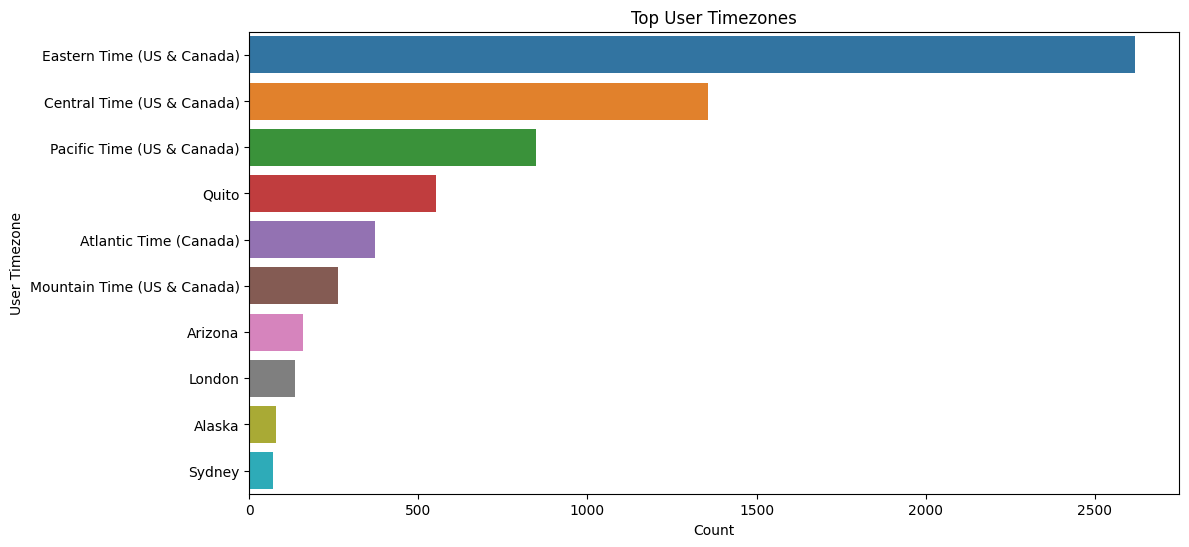

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# Task 2: Sentiment Distribution
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Task 3: Sentiment by Airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.title('Sentiment by Airline')
plt.xticks(rotation=45)
plt.show()

# Task 6: Negative Reason Analysis
negative_reason_counts = df[df['airline_sentiment'] == 'negative']['negativereason'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index)
plt.title('Negative Reason Analysis')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

# Task 5: Word Clouds
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Word Cloud for all tweets
all_tweets_text = ' '.join(df['clean_tweets'].dropna())
generate_wordcloud(all_tweets_text)

# Task 7: User Timezones
user_timezone_counts = df['user_timezone'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=user_timezone_counts.head(10).values, y=user_timezone_counts.head(10).index)
plt.title('Top User Timezones')
plt.xlabel('Count')
plt.ylabel('User Timezone')
plt.show()


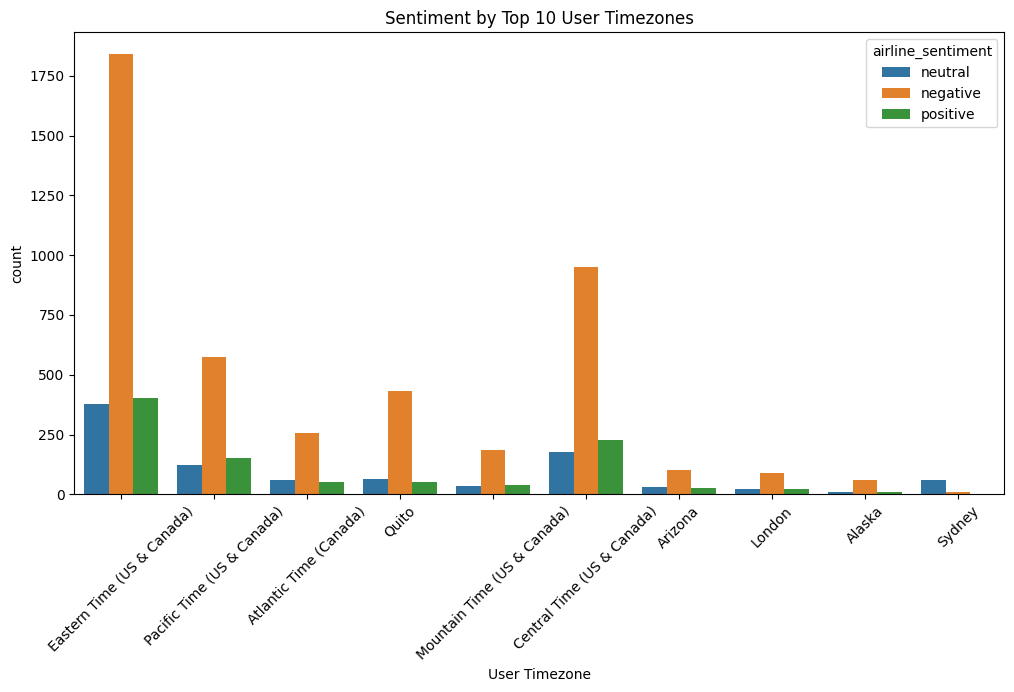

In [ ]:
top_timezones = df['user_timezone'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['user_timezone'].isin(top_timezones)], x='user_timezone', hue='airline_sentiment')
plt.title('Sentiment by Top 10 User Timezones')
plt.xlabel('User Timezone')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

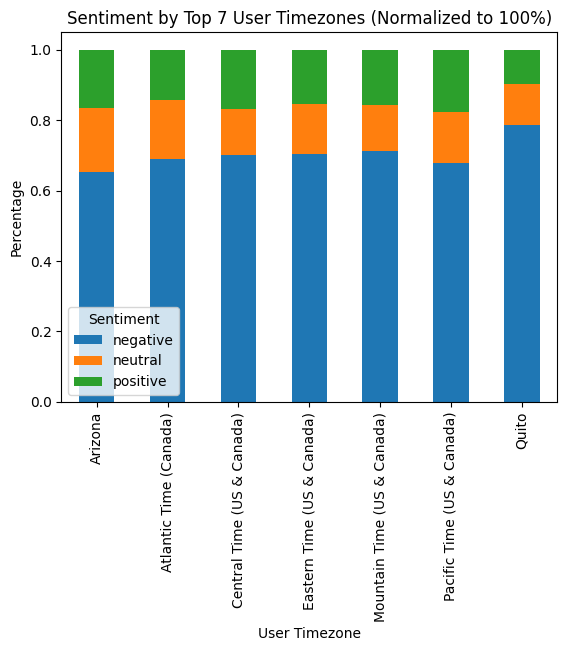

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Select the top 7 user timezones
top_timezones = df['user_timezone'].value_counts().head(7).index

# Filter the data for the top 7 timezones
filtered_data = df[df['user_timezone'].isin(top_timezones)]

# Calculate the percentage of each sentiment in each timezone
sentiment_percentage = filtered_data.groupby(['user_timezone', 'airline_sentiment']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sentiment_percentage.plot(kind='bar', stacked=True)
plt.title('Sentiment by Top 7 User Timezones (Normalized to 100%)')
plt.xlabel('User Timezone')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()
